<a href="https://colab.research.google.com/github/Hasan-024/ML-Projects/blob/main/Mnist_CNN_vs_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
(x_train, y_train),(x_test, y_test) = datasets.fashion_mnist.load_data()

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
y_train.shape

(60000,)

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [31]:
def plot_sample (x, y, index):
  plt.imshow(x[index])
  plt.xlabel(class_names[y[index]])
  plt.colorbar()
  plt.show()

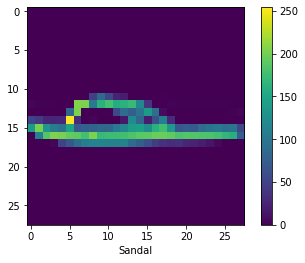

In [32]:
plot_sample (x_train,y_train, 30)

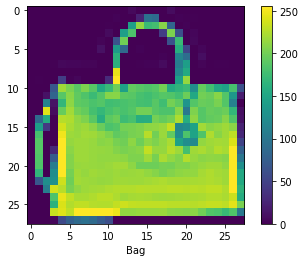

In [33]:
plot_sample (x_test,y_test, 30)

In [34]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [35]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [36]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

**Artificial neural network (ANN)**

In [37]:
ann = keras.Sequential()
ann.add(layers.Flatten(input_shape =(28,28)))
ann.add(layers.Dense(128,activation = "relu"))
ann.add(layers.Dense(10,activation = "softmax"))

In [38]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [39]:
ann.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [40]:
ann.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5006 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3728 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3342 - accuracy: 0.8790
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3094 - accuracy: 0.8873
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2940 - accuracy: 0.8921


In [41]:
from sklearn.metrics import confusion_matrix , classification_report
y_prediction = ann.predict(x_test)
y_prediction_classes = [np.argmax(element) for element in y_prediction]

print("Classification Report: \n", classification_report(y_test, y_prediction_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.78      0.78      1000
           3       0.87      0.89      0.88      1000
           4       0.79      0.79      0.79      1000
           5       0.97      0.96      0.96      1000
           6       0.67      0.69      0.68      1000
           7       0.92      0.97      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [42]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3428 - accuracy: 0.8765


[0.3428264260292053, 0.8765000104904175]

**CONVOLUTIONAL NEURAL NETWORK**

In [43]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(input_shape=[28,28,1],filters = 32, kernel_size = 3, padding = "same", activation = "relu"))
cnn.add(layers.MaxPooling2D(pool_size = (2,2)))

cnn.add(layers.Conv2D(input_shape=[28,28,1],filters = 64, kernel_size = 3, padding = "same", activation = "relu"))
cnn.add(layers.MaxPooling2D(pool_size = (2,2)))

In [44]:
cnn.add(layers.Flatten())

In [45]:
cnn.add(layers.Dropout(0.5,noise_shape=None,seed=None))

In [46]:
cnn.add(layers.Dense(units= 128,activation ="relu"))
cnn.add(layers.Dense(units= 10,activation="softmax"))

In [47]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [48]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["Accuracy"])

In [49]:
cnn.fit(x_train,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.4472 - Accuracy: 0.8382
Epoch 2/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3113 - Accuracy: 0.8857
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2672 - Accuracy: 0.9004
Epoch 4/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2438 - Accuracy: 0.9081
Epoch 5/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2240 - Accuracy: 0.9150


In [50]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.80      0.90      0.85      1000
           3       0.94      0.87      0.91      1000
           4       0.81      0.87      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.81      0.64      0.71      1000
           7       0.97      0.94      0.96      1000
           8       0.98      0.99      0.99      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000



In [52]:
test_loss, test_accuracy = cnn.evaluate(x_test, y_test, verbose = 1)
print ("The accuracy of the model is", test_accuracy)
print ("The loss of the model is", test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 0.2552 - Accuracy: 0.9057
The accuracy of the model is 0.9057000279426575
The loss of the model is 0.25521814823150635


In [58]:
y_pred = cnn.predict(x_test)

In [60]:
y_pred_1 = np.argmax(y_pred[54])
y_pred_1

2

In [63]:
y_test[54]

2